In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('diabetes.csv')
stats = df['BloodPressure'].describe()
print('Stats:', (stats.round(2)))

stats = df[['BloodPressure','Glucose']].describe()
print('stats:', (stats.round(2)))

#medians:
median = df[['BloodPressure','Glucose']].median()
print('median:', (median.round(2)))

#skewness:
skewness = df[['BloodPressure','Glucose']].skew()
print('skewness:', (skewness.round(2)))

#kurtosis:
kurtosis = df[['BloodPressure','Glucose']].kurt()
print('kurtosis:', (kurtosis.round(2)))

#correlations:
correlation = df['BloodPressure'].corr(df['Glucose'])
print('BloodPressure and Glucose is',correlation.round(2))

Stats: count    768.00
mean      69.11
std       19.36
min        0.00
25%       62.00
50%       72.00
75%       80.00
max      122.00
Name: BloodPressure, dtype: float64
stats:        BloodPressure  Glucose
count         768.00   768.00
mean           69.11   120.89
std            19.36    31.97
min             0.00     0.00
25%            62.00    99.00
50%            72.00   117.00
75%            80.00   140.25
max           122.00   199.00
median: BloodPressure     72.0
Glucose          117.0
dtype: float64
skewness: BloodPressure   -1.84
Glucose          0.17
dtype: float64
kurtosis: BloodPressure    5.18
Glucose          0.64
dtype: float64
BloodPressure and Glucose is 0.15


In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().sum()

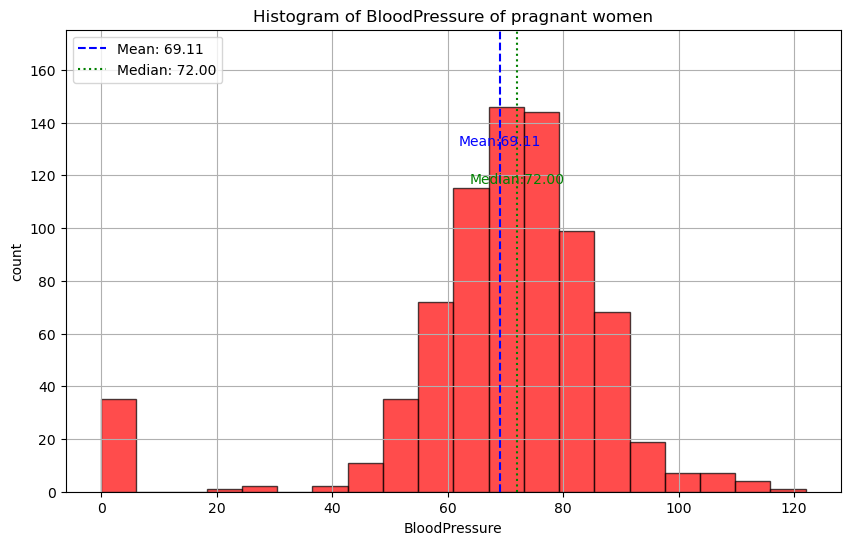

In [11]:
def plot_subplots_barplot():
    """plots of a histograms as subplots
    """
    return

fig, ax = plt.subplots(figsize=(10,6), alpha=0.7, edgecolor='black')

## 1) Plot  histogram of BloodPressure of pragnant women
counts, bins,_=plt.hist(df['BloodPressure'], color='red',bins=20, alpha=0.7, edgecolor='black')
plt.title('Histogram of BloodPressure of pragnant women', fontsize=12)
plt.xlabel('BloodPressure', fontsize=10)
plt.ylabel('count', fontsize=10)

# mean and median of var1
data_BloodPressure = df['BloodPressure']
mean_BloodPressure = data_BloodPressure.mean()
median_BloodPressure = data_BloodPressure.median()

# add vertical lines for mean and median
plt.axvline(mean_BloodPressure, color='blue', linestyle='dashed', linewidth= 1.5, label=f'Mean: {mean_BloodPressure:.2f}')
plt.axvline(median_BloodPressure, color='green', linestyle='dotted', linewidth=1.5, label=f'Median: {median_BloodPressure:.2f}')

# Annotate the mean and median 
plt.text(mean_BloodPressure, max(counts)*0.9, f'Mean:{mean_BloodPressure:.2f}', color='blue', ha = 'center')
plt.text(median_BloodPressure, max(counts)*0.8, f'Median:{median_BloodPressure:.2f}', color='green', ha = 'center')

# Set xlim and ylim ( x-axis range and y-axis range) 
plt.xlim()
plt.ylim(0, max(counts)*1.2)

# adjust layout and show the plot( add legend and grid)
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('hist.jpg', format='jpg')
plt.show()

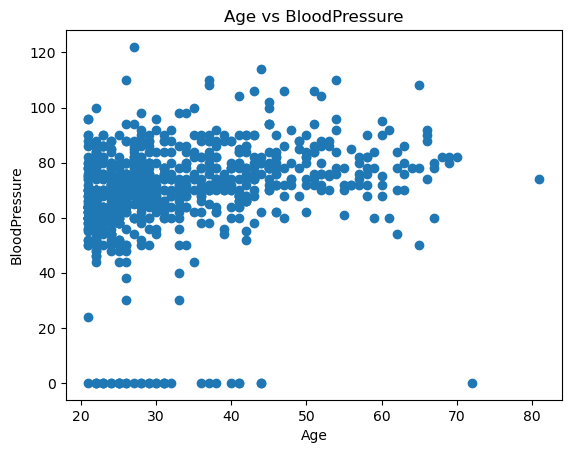

In [13]:
def plot_scatter():
    """ 
    plots of a scatterplots as subplots
    """
    return
plt.plot(figsize=(10,8), alpha=0.7, color='blue')
plt.scatter(df['Age'],df['BloodPressure'])

# insurting title,label and fontsize
plt.title('Age vs BloodPressure', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('BloodPressure', fontsize=10)


plt.savefig('scatter.jpg', format='jpg')
plt.show()

In [17]:
# Corrleation Matrix
df.select_dtypes(include='number').corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


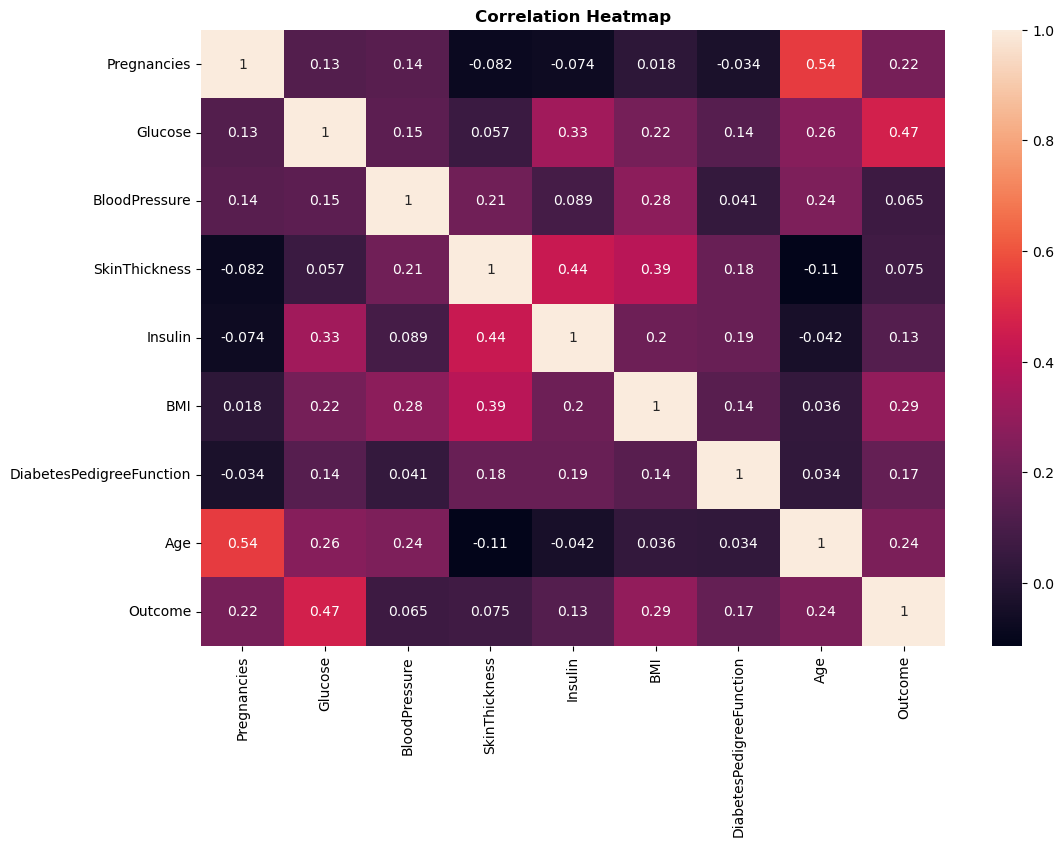

In [19]:
def plot_heatmap():
    """
    Correlation between different variables showing by using Heatmap plot
    """
    return
    

plt.figure(figsize=(12,8)) 
sns.heatmap(df.select_dtypes(include='number').corr(), annot= True,)
plt.title('Correlation Heatmap', fontdict= dict(fontweight= 'bold'))
plt.savefig('heatmap.jpg', format= 'jpg')

Elbow mathod to find no. of cluster for clustering

In [27]:
#1 selecting data columns from data set to find no. of clusters.
column1 = df['BloodPressure']
column2 = df['Age']

In [29]:
# 2 making the new data fram for nornalization
selected_colunms = pd.DataFrame({'BloodPressure': column1, 'Age': column2})

In [14]:
print(selected_colunms)

     BloodPressure  Age
0               72   50
1               66   31
2               64   32
3               66   21
4               40   33
..             ...  ...
763             76   63
764             70   27
765             72   30
766             60   47
767             70   23

[768 rows x 2 columns]


normalization process

In [31]:
#Normalization of new data fram by using StandardScaler()
scaler = StandardScaler()
scaler.fit(selected_colunms)
scaled_data = scaler.fit_transform(selected_colunms)

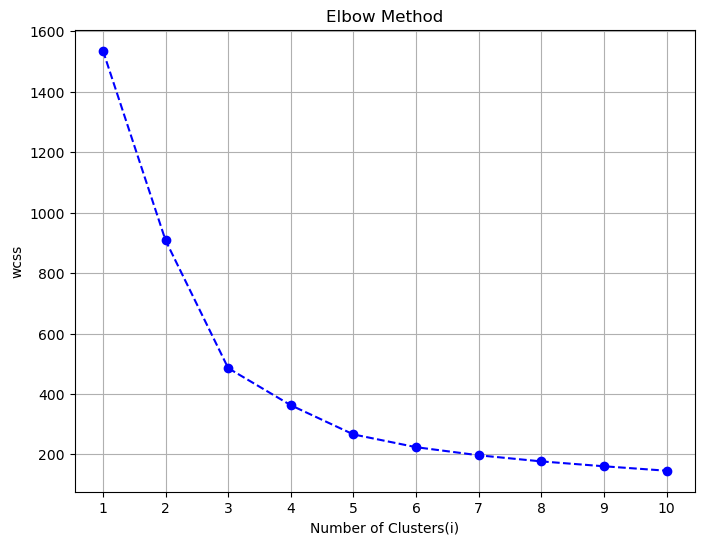

In [33]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=20,)
    kmeans.fit(scaled_data) # value of x
    wcss.append(kmeans.inertia_) # value of y
    
#plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss, marker="o", linestyle="--", color="b")
plt.title("Elbow Method")
plt.xlabel('Number of Clusters(i)')
plt.ylabel('wcss')
plt.xticks(range(1,11))
plt.grid(True)
plt.savefig('elow.jpg', format='jpg')
plt.show()


In [18]:
wcss

[1536.0000000000002,
 907.9433611181558,
 485.2351383329126,
 362.50820726040973,
 265.9048094232593,
 223.827479594715,
 196.92621020588348,
 177.22437273885686,
 159.37451211370708,
 145.23442650105397]

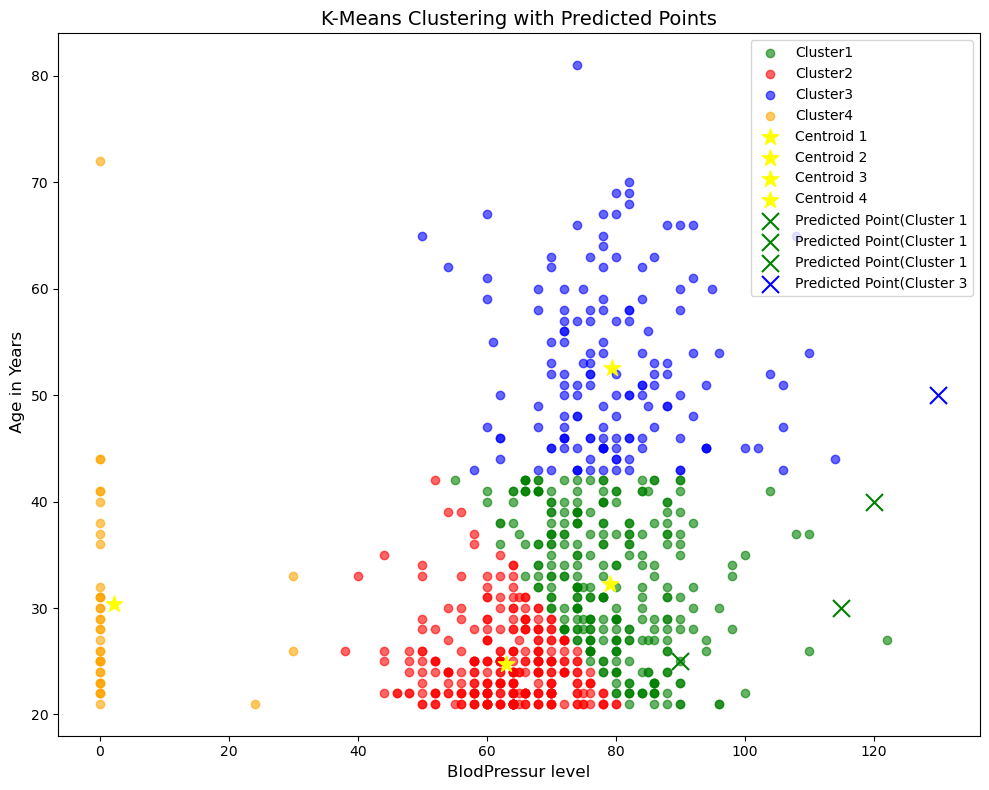

In [35]:
#4 applying kmeans with optimak i ( chose i based on elbow method)
optimal_i = 4

kmeans = KMeans(n_clusters=optimal_i, random_state=42)
kmeans.fit(scaled_data)


#5 add cluster labels to the original data(selected_data)
df['Cluster'] = kmeans.labels_

# back-scale the centroid for presentstion
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

##6 Added predicted points and assign them to cluster
# predicted points(eg:)
predicted_points = pd.DataFrame({'BloodPressure': [90, 115,120,130],
                                 'Age': [25,30,40,50]})

# Normalise predicted points
scaled_predicted_points = scaler.transform(predicted_points)

# predicted clustering assignments
predicted_points['Cluster'] = kmeans.predict(scaled_predicted_points)

#7 Visualisation of the cluster and predicted points
plt.figure(figsize=(10,8))
colors=['green','red','blue','orange']
for k in range(optimal_i):
    cluster_data=df[df['Cluster']== k]
    plt.scatter(cluster_data['BloodPressure'],cluster_data['Age'],label=F"Cluster{k+1}", color=colors[k], alpha=0.6)
    
#plot the centroids
for kdx, (x,y) in enumerate(centroids_original):
    plt.scatter(x, y, color = 'yellow', marker='*', s=150, label=f"Centroid {kdx+1}")

# plot the predicted points with their cluster labels
for _, row in predicted_points.iterrows():
    plt.scatter(row['BloodPressure'], row['Age'], color=colors[row['Cluster']], edgecolor='black', marker='x', s=150, label=f"Predicted Point(Cluster {row['Cluster']+1}")

# Add labels and legends
plt.xlabel("BlodPressur level", fontsize=12)
plt.ylabel(" Age in Years", fontsize=12)
plt.title("K-Means Clustering with Predicted Points",fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('clustering.jpg', format='jpg')
plt.show()

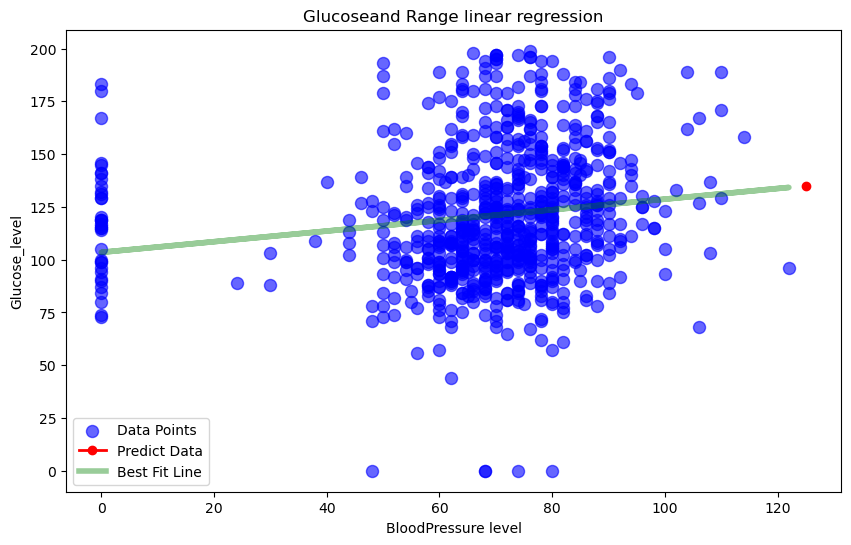

In [67]:
# plot the data points
def best_fit_line(BloodPressure_level,Glucose_level):
    slope =(((mean(BloodPressure_level)* mean(Glucose_level))- mean(BloodPressure_level * Glucose_level))/((mean(BloodPressure_level) * mean(BloodPressure_level))-mean(BloodPressure_level*BloodPressure_level)))
    y_intecept = mean(Glucose_level)- slope * mean(BloodPressure_level)
    return slope, y_intercept

              
#loading in dataframe and selecting a portio
BloodPressure_level= df['BloodPressure'].values.reshape(-1, 1)
Glucose_level= df['Glucose'].values

#Create linear regression object
Pressure_Glucose = linear_model.LinearRegression()

#Train the model using the training sets
Pressure_Glucose.fit(BloodPressure_level.reshape(-1,1), Glucose_level)

#get the regression Line using the model
regression_line = Pressure_Glucose.predict(BloodPressure_level.reshape(-1,1))

#Making predictions
Predict_BloodPressure_level = 125
Predict_Glucose_level = Pressure_Glucose.predict(np.array([[Predict_BloodPressure_level]]))[0]

#PLot
plt.figure(figsize=(10,6))
plt.scatter(BloodPressure_level, Glucose_level, label='Data Points', alpha=0.6,color='blue',s=75)
plt.plot(Predict_BloodPressure_level, Predict_Glucose_level, label='Predict Data',color='red', linewidth=2, marker='o', markersize=6)
plt.plot(BloodPressure_level, regression_line,label='Best Fit Line', color='green', linewidth=4, alpha=0.4)
plt.title('Glucoseand Range linear regression')
plt.xlabel('BloodPressure level')
plt.ylabel('Glucose_level')
plt.legend()
plt.savefig('fitting_line_regression.png')
plt.show()


In [ ]:
#reg= LinearRegression()